In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, SpatialDropout2D, BatchNormalization, Input,Activation, Dense, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.models import Model,save_model

In [3]:
import os
print(os.getcwd())

/kaggle/working


In [4]:
path  = "../input/face-mask-12k-images-dataset/Face Mask Dataset/"


image_list = os.listdir(path)
image_list

['Validation', 'Test', 'Train']

In [5]:
image_filenames = glob.glob(os.path.join(path,'**/*.png'), recursive=True)

df = pd.DataFrame({'filename': image_filenames})

df['partition'] = df['filename'].apply(lambda x: x.split(os.sep)[-3])

df['label'] = df['filename'].apply(lambda x: x.split(os.sep)[-2])

df.head()

,filename,partition,label
0,../input/face-mask-12k-images-dataset/Face Mas...,Validation,WithoutMask
1,../input/face-mask-12k-images-dataset/Face Mas...,Validation,WithoutMask
2,../input/face-mask-12k-images-dataset/Face Mas...,Validation,WithoutMask
3,../input/face-mask-12k-images-dataset/Face Mas...,Validation,WithoutMask
4,../input/face-mask-12k-images-dataset/Face Mas...,Validation,WithoutMask


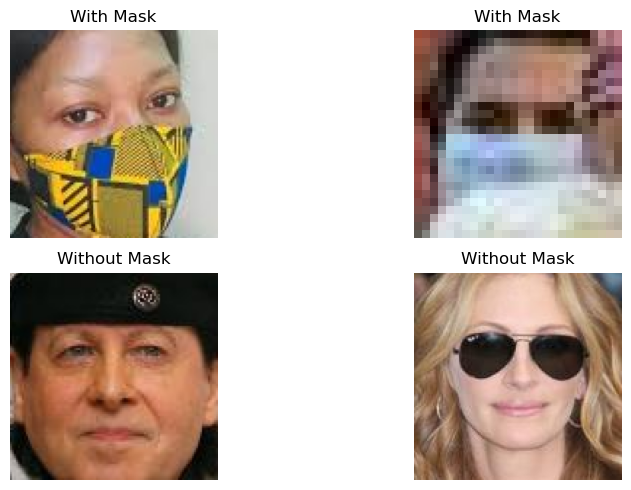

In [6]:

fig, axs = plt.subplots(2, 2, figsize=(10,5))

with_mask = df.query('label == "WithMask"').sample(n=2, random_state=np.random.randint(100))


without_mask = df.query('label == "WithoutMask"').sample(n=2, random_state=np.random.randint(100))


for i in range(2):
    axs.flat[i].imshow(plt.imread(with_mask['filename'].iloc[i]))
    axs.flat[i].set_title("With Mask")
    axs.flat[i].axis('off')


for i in range(2):
    axs.flat[i+2].imshow(plt.imread(without_mask['filename'].iloc[i]))
    axs.flat[i+2].set_title("Without Mask")
    axs.flat[i+2].axis('off')

plt.tight_layout()
plt.show()

In [7]:
image_generator=ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
image_generator=ImageDataGenerator(rescale=1/255)

Training = image_generator.flow_from_directory('../input/face-mask-12k-images-dataset/Face Mask Dataset/Train',target_size=(128,128),
                                            batch_size=32,class_mode='binary')

Validation = image_generator.flow_from_directory('../input/face-mask-12k-images-dataset/Face Mask Dataset/Validation' , target_size=(128,128),
                                            batch_size=32,class_mode='binary')

Test = image_generator.flow_from_directory('../input/face-mask-12k-images-dataset/Face Mask Dataset/Test' ,target_size=(128,128),
                                            batch_size=32,class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [8]:
input_shape = (128,128,3)

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = input_shape))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))


model.add(Conv2D(filters =128 , kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#model.add(Dense(64,activation='sigmoid'))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))



model.add(Flatten())
#model.add(Dense(1024))
model.add(Dense(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

In [9]:
model.compile(optimizer = 'Adam' , loss = "binary_crossentropy", metrics=["accuracy"])
train_step=Training.n//Training.batch_size
test_step=Test.n//Test.batch_size
valid_step =Validation.n//Validation.batch_size

num_epochs = 15

history = model.fit_generator(Training,
                                      steps_per_epoch=train_step,
                                      epochs=num_epochs, 
                                      validation_data=Validation,
                                      validation_steps=valid_step)

/tmp/ipykernel_28/1105694665.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(Training,


Epoch 1/15


2023-07-29 17:25:59.360556: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


312/312 [==============================] - 96s 276ms/step - loss: 0.3759 - accuracy: 0.8818 - val_loss: 0.1182 - val_accuracy: 0.9613
Epoch 2/15
312/312 [==============================] - 24s 76ms/step - loss: 1.1230 - accuracy: 0.9542 - val_loss: 0.0752 - val_accuracy: 0.9737
Epoch 3/15
312/312 [==============================] - 24s 78ms/step - loss: 2.0790 - accuracy: 0.9642 - val_loss: 0.0611 - val_accuracy: 0.9775
Epoch 4/15
312/312 [==============================] - 24s 76ms/step - loss: 0.4362 - accuracy: 0.9732 - val_loss: 0.0837 - val_accuracy: 0.9688
Epoch 5/15
312/312 [==============================] - 24s 77ms/step - loss: 3.9346 - accuracy: 0.9720 - val_loss: 0.2025 - val_accuracy: 0.9513
Epoch 6/15
312/312 [==============================] - 24s 75ms/step - loss: 1.7735 - accuracy: 0.9635 - val_loss: 0.0601 - val_accuracy: 0.9800
Epoch 7/15
312/312 [==============================] - 24s 76ms/step - loss: 0.6157 - accuracy: 0.9757 - val_loss: 0.0368 - val_accuracy: 0.9875
Ep

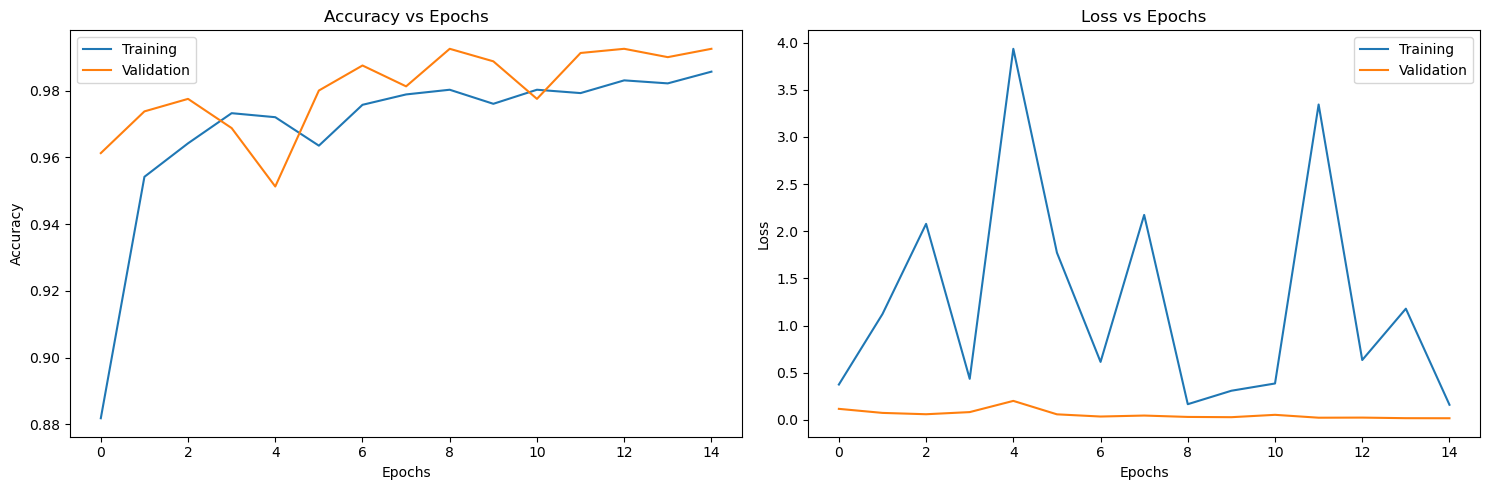

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(history.history['accuracy'],label='Training')
axs[0].plot(history.history['val_accuracy'],label='Validation')
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].set_title("Accuracy vs Epochs")

axs[1].plot(history.history['loss'],label='Training')
axs[1].plot(history.history['val_loss'],label='Validation')
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Loss")
axs[1].legend()
axs[1].set_title("Loss vs Epochs")

plt.tight_layout()
plt.show()

(128, 128, 3)
(1, 128, 128, 3)
1/1 [==============================] - 0s 20ms/step
[[1.]]
Text(0.5, 1.0, 'Without Mask')


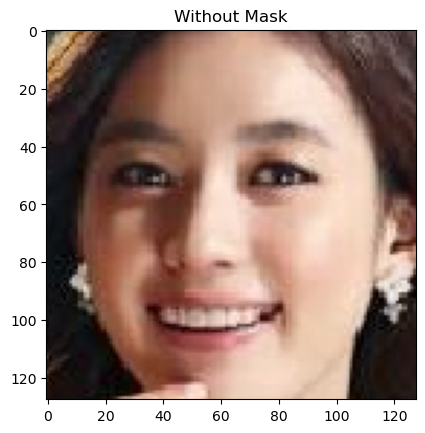

In [20]:
test_image=image.load_img('../input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithoutMask/1203.png',
                 target_size=(128,128))
plt.imshow(test_image)

test_image=image.img_to_array(test_image)
print(test_image.shape)
test_image=test_image.reshape(1,128,128,3)
print(test_image.shape)

# Making a prediction
result=model.predict(test_image)
print(result)

if result[0][0]<0.5:
    print(plt.title('With Mask'))
else:
    print(plt.title('Without Mask'))

(128, 128, 3)
(1, 128, 128, 3)
1/1 [==============================] - 0s 21ms/step
[[0.]]
Text(0.5, 1.0, 'With Mask')


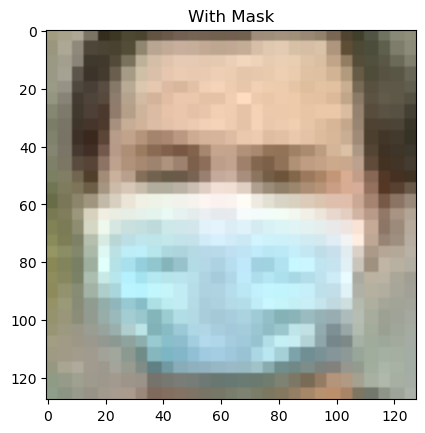

In [26]:
test_image=image.load_img('/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithMask/1361.png',
                 target_size=(128,128))
plt.imshow(test_image)

test_image=image.img_to_array(test_image)
print(test_image.shape)
test_image=test_image.reshape(1,128,128,3)
print(test_image.shape)

# Making a prediction
result=model.predict(test_image)
print(result)

if result[0][0]<0.5:
    print(plt.title('With Mask'))
else:
    print(plt.title('Without Mask'))